In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np

import os 

In [2]:
from supporting_function import*

In [3]:
df = pd.read_csv("azd.csv")

In [4]:
#Filtering the data. 
df=df[['priceDate','arrivals','minPrice','maxPrice','modalPrice']] 

In [5]:
df["mis_m1_minprice"]    = df["minPrice"]
df["mis_m1_maxprice"]    = df["maxPrice"]
df["mis_m1_modalprice"]  = df["modalPrice"]
####
df["mis_m2_minprice"]    = df["minPrice"]
df["mis_m2_maxprice"]    = df["maxPrice"]
df["mis_m2_modalprice"]  = df["modalPrice"]
####

In [6]:
#Writing Descriptive analysis. 
file_path ="csv_output/descriptive_analysis.csv"
if os.path.exists(file_path):
    print("File already written!!!.....")
else:
    df.describe().to_csv(file_path)

File already written!!!.....


In [7]:
# Missing Value Treatment
#Method 1 : Using mean to substitute missing values. 
col_name = "mis_m1_minprice"
df = replace_mis_val_mean(df,col_name)

col_name = "mis_m1_maxprice"
df = replace_mis_val_mean(df,col_name)


col_name = "mis_m1_modalprice"
df = replace_mis_val_mean(df,col_name)




In [8]:
# Missing Value Treatment
#Method 2 : Using Linear Regression for filling missing values 
col_name = "mis_m2_minprice"
df = mis_replace_linear_regression(df,X_col= ["maxPrice","modalPrice"],Y_col=col_name)

col_name = "mis_m2_maxprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


col_name = "mis_m2_modalprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [9]:
# Outlier handling
col_name ="mis_m2_minprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_maxprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_modalprice"
df = handle_outlier(df,col_name,df[col_name].mean())

In [10]:
df.head()

,priceDate,arrivals,minPrice,maxPrice,modalPrice,mis_m1_minprice,mis_m1_maxprice,mis_m1_modalprice,mis_m2_minprice,mis_m2_maxprice,mis_m2_modalprice
0,2005-04-11,106.0,300.0,663.0,475.0,300.0,663.0,475.0,300.0,663.0,475.0
1,2005-04-12,1745.0,325.0,688.0,500.0,325.0,688.0,500.0,325.0,688.0,500.0
2,2005-04-13,1233.0,300.0,688.0,488.0,300.0,688.0,488.0,300.0,688.0,488.0
3,2005-04-16,1654.0,350.0,650.0,475.0,350.0,650.0,475.0,350.0,650.0,475.0
4,2005-04-18,26.0,350.0,650.0,475.0,350.0,650.0,475.0,350.0,650.0,475.0


In [11]:
df_new = df.copy()

In [12]:
df_ts =df_new[["priceDate","mis_m2_minprice","mis_m2_maxprice","mis_m2_modalprice"]]

In [13]:
df_ts.head()

,priceDate,mis_m2_minprice,mis_m2_maxprice,mis_m2_modalprice
0,2005-04-11,300.0,663.0,475.0
1,2005-04-12,325.0,688.0,500.0
2,2005-04-13,300.0,688.0,488.0
3,2005-04-16,350.0,650.0,475.0
4,2005-04-18,350.0,650.0,475.0


In [14]:
df_ts.columns = ["timestamp","min_price","max_price","modal_price"]

In [15]:
df_ts["timestamp"]= pd.to_datetime(df_ts["timestamp"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Saving Figure!!!!


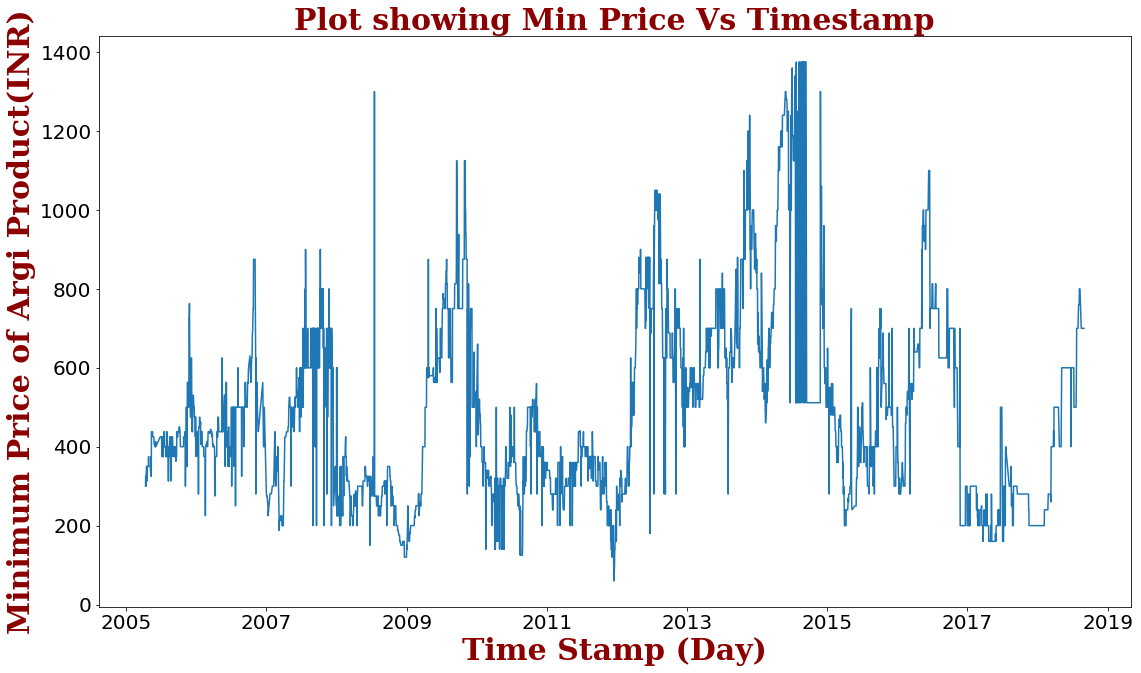

Saving Figure!!!!


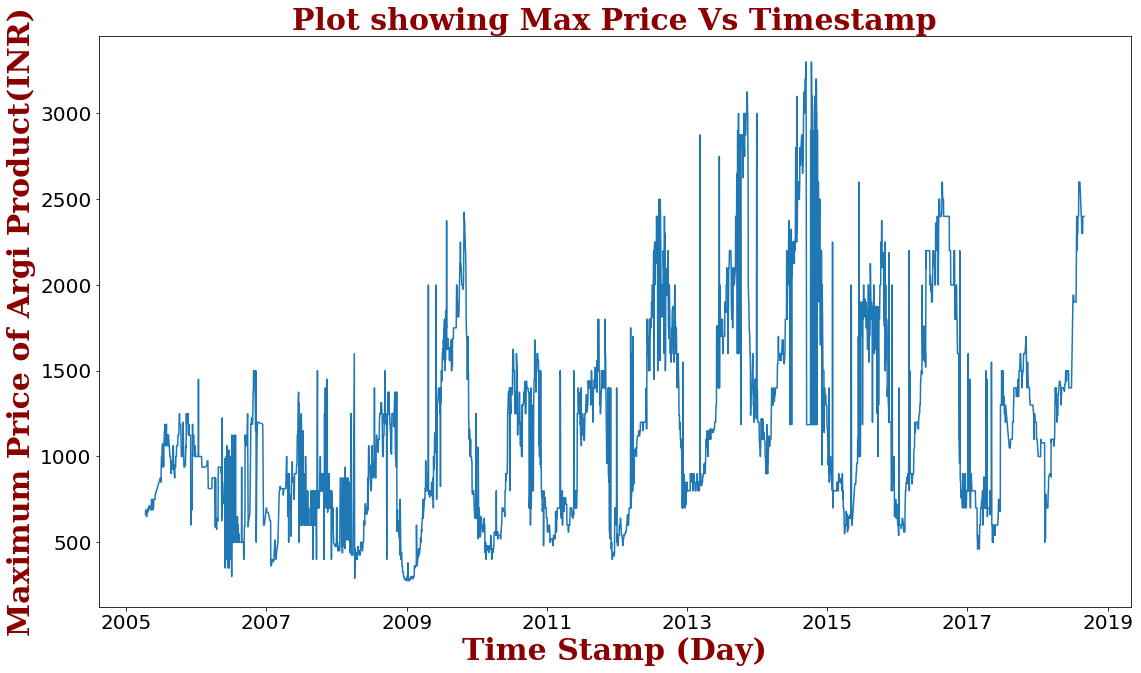

Saving Figure!!!!


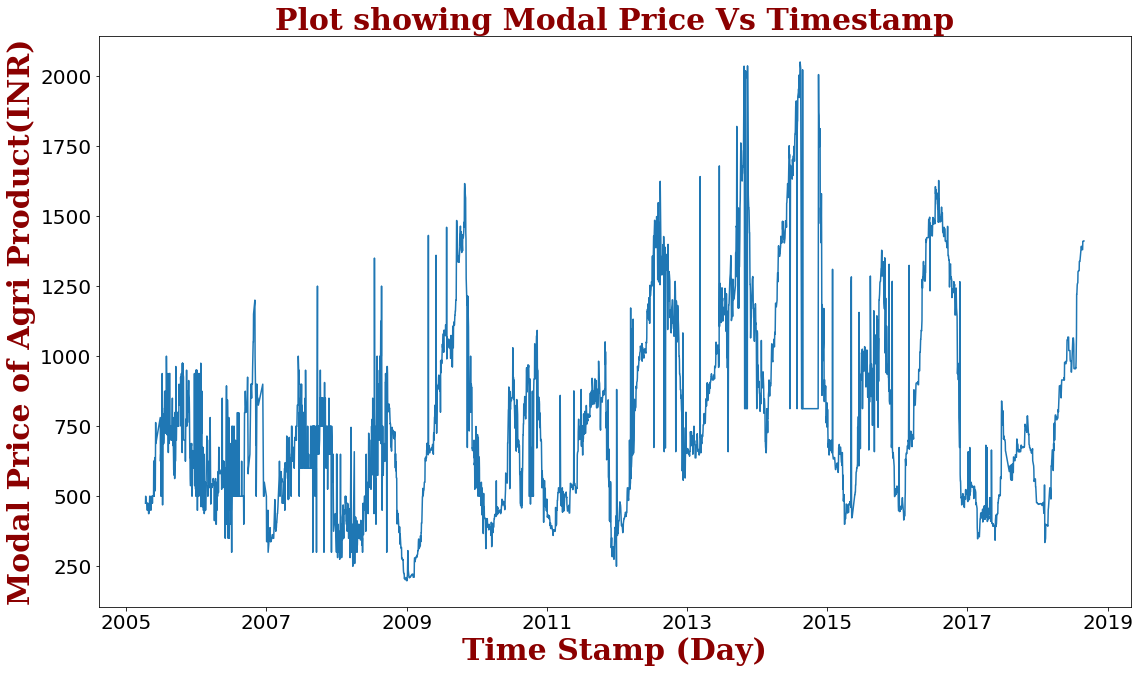

In [16]:
####
df_plot_series = df_ts.copy()
time_col = "Time Stamp (Day)"
min_col  = "Minimum Price of Argi Product(INR)"
max_col  = "Maximum Price of Argi Product(INR)"
mod_col  = "Modal Price of Agri Product(INR)"
df_plot_series.columns = [time_col,min_col,max_col,mod_col]
#######


title = "Plot showing Min Price Vs Timestamp"
file_path = "plots/Actual_minprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=min_col,title=title,hard_save=True)


title = "Plot showing Max Price Vs Timestamp"
file_path = "plots/Actual_maxprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=max_col,title=title,hard_save=True)

title = "Plot showing Modal Price Vs Timestamp"
file_path = "plots/Actual_modprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=mod_col,title=title,hard_save=True)







In [17]:
file_path_fun_mva=lambda x,y: "plots/"+x+'_moving_averages_'+ convert_list_to_str(y) +".png"

In [18]:
file_path_fun_mva('min',[30,50,100])

'plots/min_moving_averages_30_50_100.png'

Saving Figure!!!!


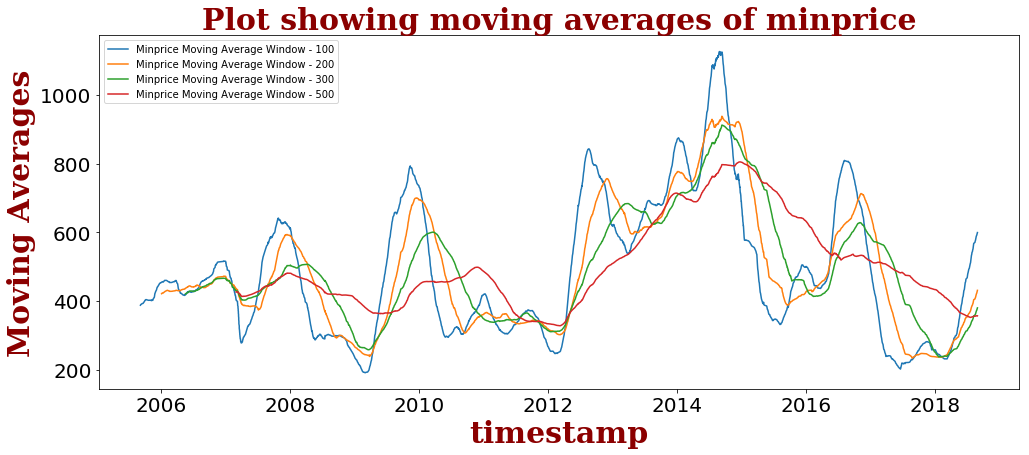

Saving Figure!!!!


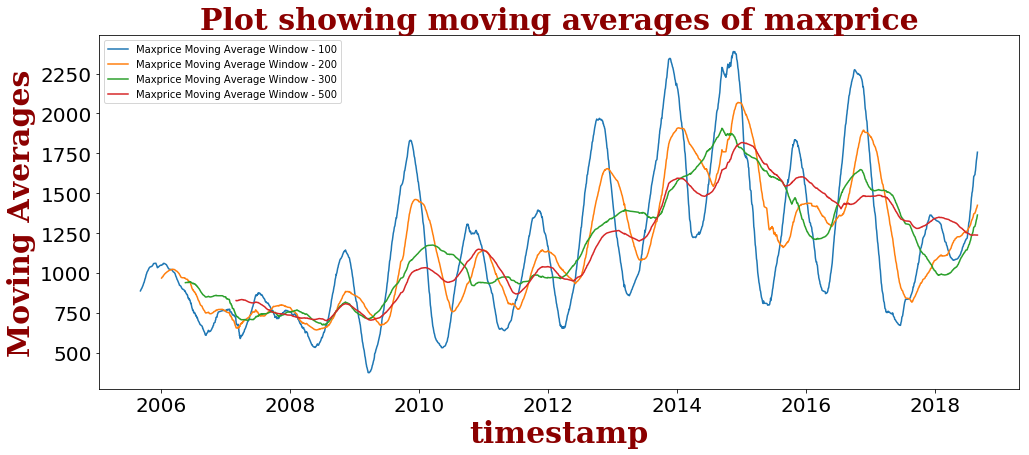

Saving Figure!!!!


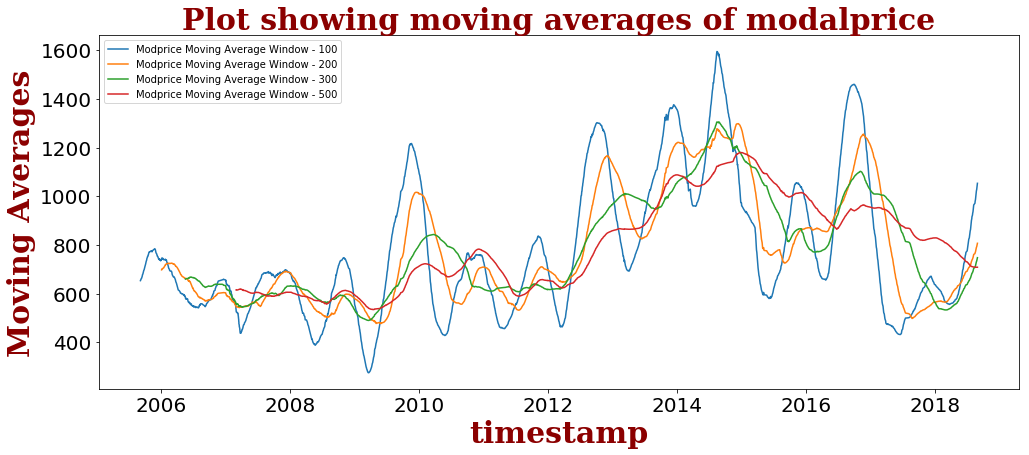

In [25]:
###################  

df_ts_m= df_ts.copy()

col_name_min = "min_price"
col_name_prefix_min = "Minprice"
##
col_name_max = "max_price"
col_name_prefix_max = "Maxprice"
##
col_name_mod = "modal_price"
col_name_prefix_mod = "Modprice"
##
window_size_list = [100,200,300,500]
data_col_list    = []
##

    
#file_path_fun_mva=lambda x,y: " plots/"+x+'_moving_averages_'+ _convert_list_to_str(window_size_list) +".png"

col_function = lambda x,y : x +"_"+"m_avg_"+str(y)
col_function_bus = lambda x,y : x +" "+"Moving Average Window - "+str(y)

generate_col = col_function_bus


df_ts_m,data_col_list_min=find_moving_averages(df_ts_m,col_name_min,col_name_prefix_min,window_size_list,generate_col)
df_ts_m,data_col_list_max=find_moving_averages(df_ts_m,col_name_max,col_name_prefix_max,window_size_list,generate_col)
df_ts_m,data_col_list_mod=find_moving_averages(df_ts_m,col_name_mod,col_name_prefix_mod,window_size_list,generate_col)

#############################  PLOT FOR MOVING AVERAGE

title = "Plot showing moving averages of minprice"

x_col  = "timestamp"
plotting_multiple_series(df_ts_m,file_path_fun_mva('min',window_size_list),data_col_list_min,x_col,title=title,hard_save=True)


title = "Plot showing moving averages of maxprice"
file_path = "plots/max_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('max',window_size_list),data_col_list_max,x_col,title=title,hard_save=True)

title = "Plot showing moving averages of modalprice"
file_path = "plots/modal_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('mod',window_size_list),data_col_list_mod,x_col,title=title,hard_save=True)





Saving Figure!!!!


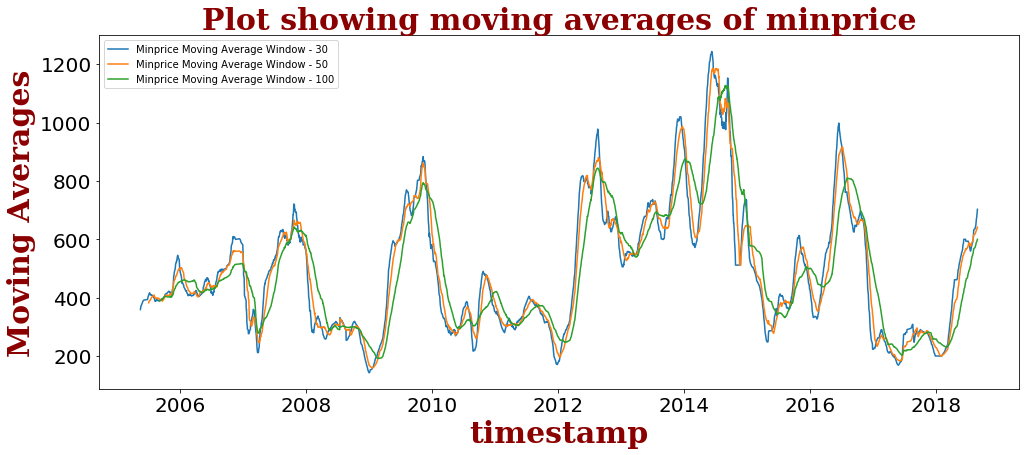

Saving Figure!!!!


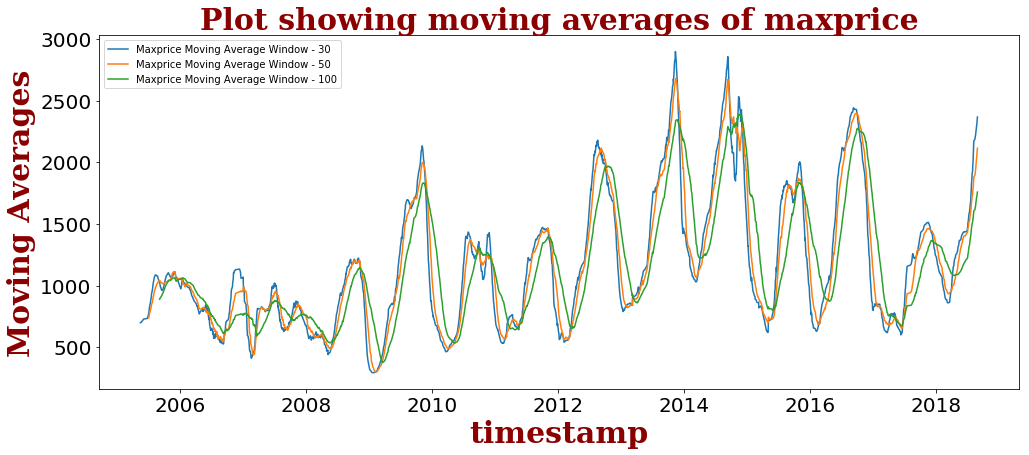

Saving Figure!!!!


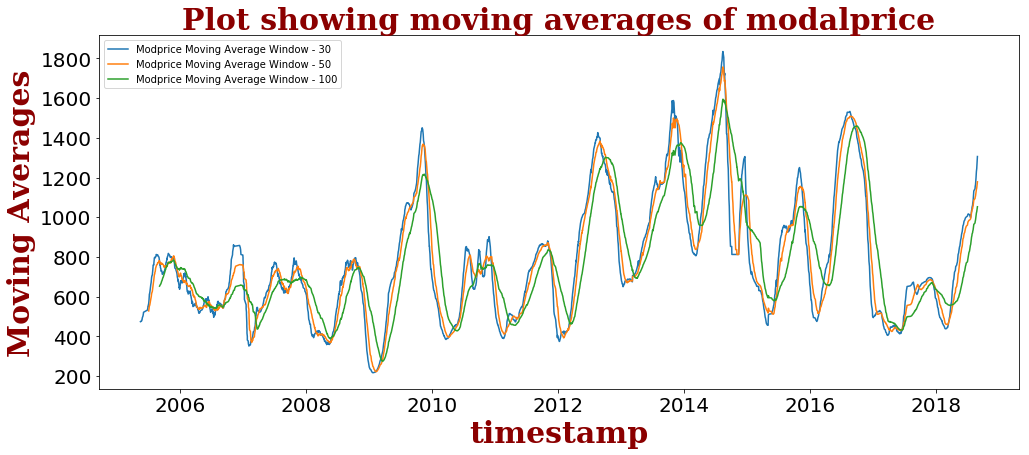

In [21]:

title = "Plot showing moving averages of minprice"
list_window=[0,10,30,50,100]
x_col  = "timestamp"
plotting_multiple_series(df_ts_m,file_path_fun_mva('min',list_window),data_col_list_min,x_col,title=title,hard_save=True)


title = "Plot showing moving averages of maxprice"
file_path = "plots/max_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('max',list_window),data_col_list_max,x_col,title=title,hard_save=True)

title = "Plot showing moving averages of modalprice"
file_path = "plots/modal_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('mod',list_window),data_col_list_mod,x_col,title=title,hard_save=True)





In [ ]:
df.priceDate = pd.to_datetime(df.priceDate) #conveting the date column as index

In [ ]:
df.set_index('priceDate', inplace=True)

In [ ]:
df.plot()
plt.show()

In [ ]:
df.plot(use_index=True,y='minPrice')

In [ ]:
#mean = numpy.mean(elements, axis=0)
#sd = numpy.std(elements, axis=0)
#df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#def remove_outlier(df, col_name):
 #   q1 = df[col_name].quantile(0.25)
 #   q3 = df[col_name].quantile(0.75)
  #  iqr = q3-q1 #Interquartile range
   # fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    #df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    #return df_out
#final_list = [x for x in df['maxPrice'] if (x > mean - 2 * sd)]
#final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [ ]:
# remove_outlier(df,'maxPrice')
# remove_outlier(df,'modalPrice')
# remove_outlier(df,'minPrice')

In [ ]:
df.describe()

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
df.plot(use_index=True,y='maxPrice')

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
#rolmean=df.rolling(window=3).mean()
def add_mean_std_cols(df,col_name,t):
    res = df[col_name].rolling(t).agg(['mean'])
    #res.columns = res.columns.map('_'.join)
    #cols = np.concatenate(list(zip(df.columns, res.columns[0::2], res.columns[1::2])))
    #final = res.join(df).loc[:, cols]
    return res


#for i in range(2,10):
#   df['MA{}'.format(i)] = df.rolling(window=i).mean()


In [ ]:
n_df_min=add_mean_std_cols(df,["minPrice"],3)
n_df_max=add_mean_std_cols(df,["maxPrice"],3)
n_df_mode=add_mean_std_cols(df,["modalPrice"],3)

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean=plt.plot(n_df_min,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_max=plt.plot(n_df_max,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_modal=plt.plot(n_df_mode,label='mean')

In [ ]:
from 